# Microsoft Movie Studio

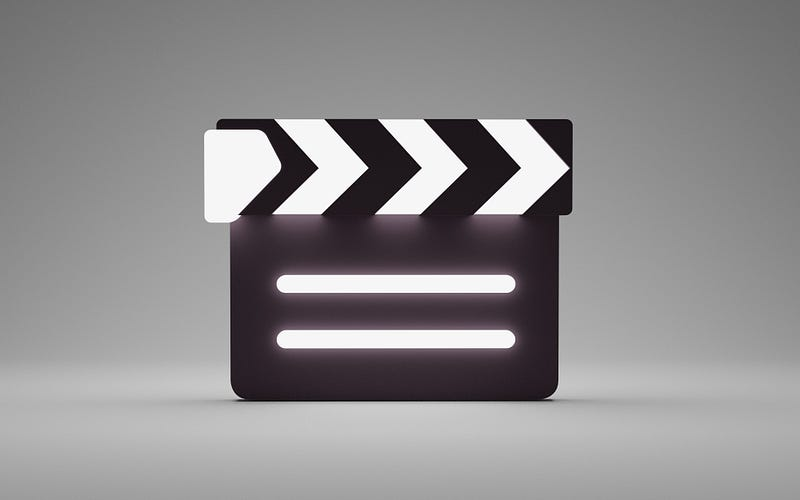

## Overview

## Business Problem

## Data

To answer the business questions, we utilized various data sets including the IMBD Database and then selected the following that have relevant factors such as ratings and genres of past movies to guide our insights and recommendations. 

In [62]:
import pandas as pd
import sqlite3

In [63]:
conn = sqlite3.connect('Data/im.db')

In [64]:
pd.read_sql("""

SELECT *
FROM movie_basics


""", conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [81]:
pd.read_sql("""

SELECT *
FROM movie_basics


""", conn).head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [65]:
pd.read_sql("""

SELECT *
FROM movie_ratings


""", conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [82]:
pd.read_sql("""

SELECT *
FROM movie_ratings


""", conn).head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


We joined the movie_basics table that contains movie_id and genres and the movie_ratings table to analyze what genre(s) has received the highest rating on average.

In [68]:
pd.read_sql("""

SELECT mb.movie_id AS Movie_ID, mb.genres AS Genres, mr.averagerating AS  Avg_Rating
FROM movie_basics AS mb
    JOIN movie_ratings AS mr
        ON mb.movie_id = mr.movie_id

""", conn)

,Movie_ID,Genres,Avg_Rating
0,tt0063540,"Action,Crime,Drama",7.0
1,tt0066787,"Biography,Drama",7.2
2,tt0069049,Drama,6.9
3,tt0069204,"Comedy,Drama",6.1
4,tt0100275,"Comedy,Drama,Fantasy",6.5
...,...,...,...
73851,tt9913084,Documentary,6.2
73852,tt9914286,"Drama,Family",8.7
73853,tt9914642,Documentary,8.5
73854,tt9914942,None,6.6


## Data Preparation

In [69]:
# Converting to pd.DataFrame for cleaner manipulation

genre_df = pd.DataFrame(pd.read_sql("""

SELECT mb.movie_id AS Movie_ID, mb.genres AS Genres, mr.averagerating AS  Avg_Rating
FROM movie_basics AS mb
    JOIN movie_ratings AS mr
        ON mb.movie_id = mr.movie_id

""", conn))

In [71]:
genre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Movie_ID    73856 non-null  object 
 1   Genres      73052 non-null  object 
 2   Avg_Rating  73856 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.7+ MB


In [72]:
genre_df.isna().sum()

Movie_ID        0
Genres        804
Avg_Rating      0
dtype: int64

In [80]:
genre_df = genre_df.dropna(subset=['Genres'])

genre_df

,Movie_ID,Genres,Avg_Rating
0,tt0063540,"Action,Crime,Drama",7.0
1,tt0066787,"Biography,Drama",7.2
2,tt0069049,Drama,6.9
3,tt0069204,"Comedy,Drama",6.1
4,tt0100275,"Comedy,Drama,Fantasy",6.5
...,...,...,...
73850,tt9913056,Documentary,6.2
73851,tt9913084,Documentary,6.2
73852,tt9914286,"Drama,Family",8.7
73853,tt9914642,Documentary,8.5


In [79]:
import matplotlib.pyplot as plt